## Starting Off: Getting a Feel for the Data
Just loading the 911 call data and poking around a bit—want to see what we're dealing with. I'll extract some time-based features too since those usually come in handy.

In [2]:
import pandas as pd


pd.set_option('display.max_columns', 100)
df = pd.read_csv(
    '/Users/lucacostut/Desktop/BDT project/data/911_Calls_for_Service.csv',
    sep='\t',                 
    on_bad_lines='skip',
    encoding='utf-8',
    engine='python'
)

print("Shape:", df.shape)
df.head()

# Quick structure check — what's inside?
df.info()

Shape: (1048575, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   recordId                     1048575 non-null  int64  
 1   callKey                      1048575 non-null  object 
 2   callDateTime                 1048575 non-null  object 
 3   priority                     1048574 non-null  object 
 4   district                     1048575 non-null  object 
 5   description                  1048575 non-null  object 
 6   callNumber                   1048575 non-null  object 
 7   incidentLocation             1048575 non-null  object 
 8   location                     1048575 non-null  object 
 9   Neighborhood                 1047449 non-null  object 
 10  PoliceDistrict               1047557 non-null  object 
 11  PolicePost                   1047557 non-null  float64
 12  CouncilDistrict      

In [3]:
# Let's see where the null values are — might need to clean some of these up
df.isnull().sum().sort_values(ascending=False)

Unnamed: 19                    1048575
Community_Statistical_Areas       1647
ZIPCode                           1498
Neighborhood                      1126
Census_Tracts                     1086
SheriffDistricts                  1046
PolicePost                        1018
PoliceDistrict                    1018
CouncilDistrict                    970
priority                             1
location                             0
incidentLocation                     0
callKey                              0
callNumber                           0
description                          0
district                             0
callDateTime                         0
NeedsSync                            0
ESRI_OID                             0
recordId                             0
dtype: int64

In [4]:
# (Yeah, running this again — just double-checking after looking at the structure)
df.isnull().sum().sort_values(ascending=False)

Unnamed: 19                    1048575
Community_Statistical_Areas       1647
ZIPCode                           1498
Neighborhood                      1126
Census_Tracts                     1086
SheriffDistricts                  1046
PolicePost                        1018
PoliceDistrict                    1018
CouncilDistrict                    970
priority                             1
location                             0
incidentLocation                     0
callKey                              0
callNumber                           0
description                          0
district                             0
callDateTime                         0
NeedsSync                            0
ESRI_OID                             0
recordId                             0
dtype: int64

In [5]:
# Time to convert the call timestamps and clean things up a bit
df['callDateTime'] = pd.to_datetime(df['callDateTime'], errors='coerce')

# Looks like there's an empty column—dropping it
df.drop(columns=['Unnamed: 19'], inplace=True)

# Also dropping rows with no timestamp
df = df.dropna(subset=['callDateTime'])

# Now creating some useful time-related columns
df['Hour'] = df['callDateTime'].dt.hour
df['DayOfWeek'] = df['callDateTime'].dt.day_name()
df['Month'] = df['callDateTime'].dt.month
df['Year'] = df['callDateTime'].dt.year

# Just in case — trimming extra whitespace in some string columns
df['description'] = df['description'].str.strip()
df['priority'] = df['priority'].str.strip()

## Step 2: Exploratory Data Analysis (EDA)
In this step, we explore patterns in the emergency call data to understand when and where incidents occur most frequently. We generate statistics and visualizations for:

Distribution of calls by hour of the day
Trends across days of the week
Most common emergency types
Top ZIP codes receiving the highest number of calls
These insights help identify hotspots and peak times, which guide both the training of our prediction model and the strategic placement of rescue drones.

In [6]:
# Top 10 most common emergency types
df['description'].value_counts().head(10)


description
DISORDERLY        146716
911/NO  VOICE     119107
AUTO ACCIDENT      57987
COMMON ASSAULT     56121
SILENT ALARM       50512
FAMILY DISTURB     36312
NARCOTICS          36289
OTHER              36286
HIT AND RUN        27743
LARCENY            26737
Name: count, dtype: int64

/var/folders/31/9x7_943517v2frgshb22nr_40000gn/T/ipykernel_66466/1379580064.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


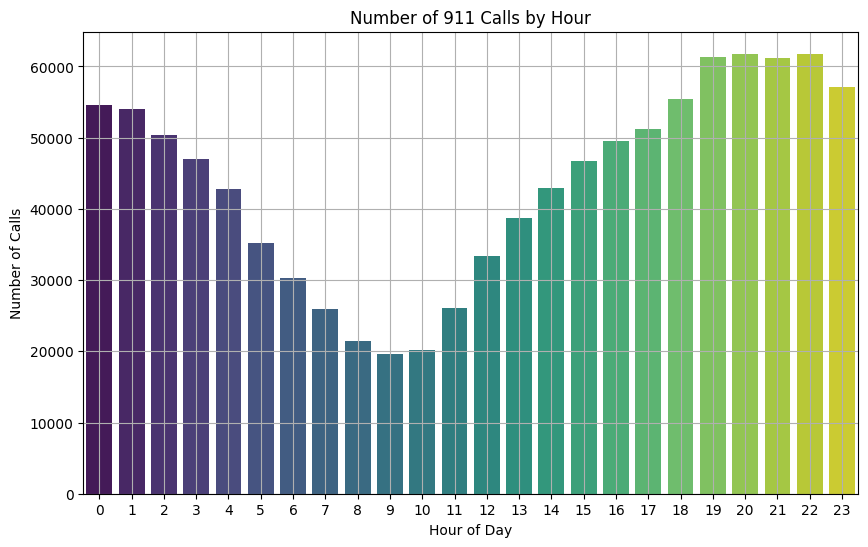

In [7]:
# Plot calls per hour
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Number of 911 Calls by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()


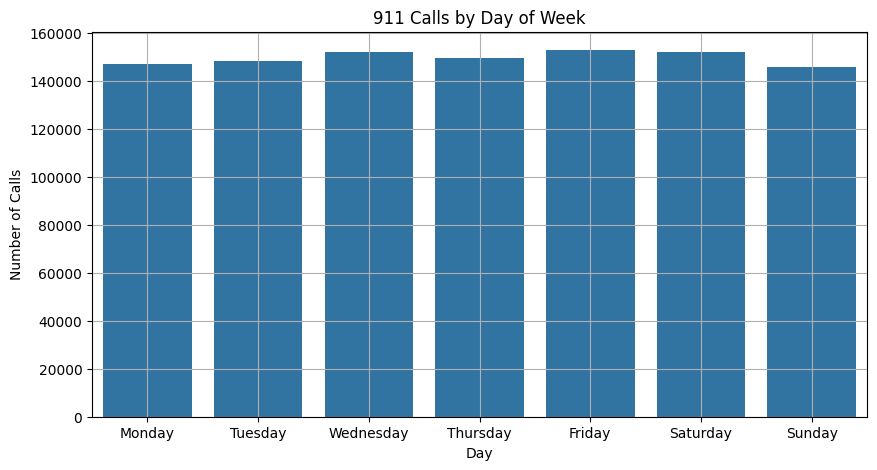

In [8]:
# 911 Calls by Day of Week
plt.figure(figsize=(10, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='DayOfWeek', data=df, order=order)
plt.title('911 Calls by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()


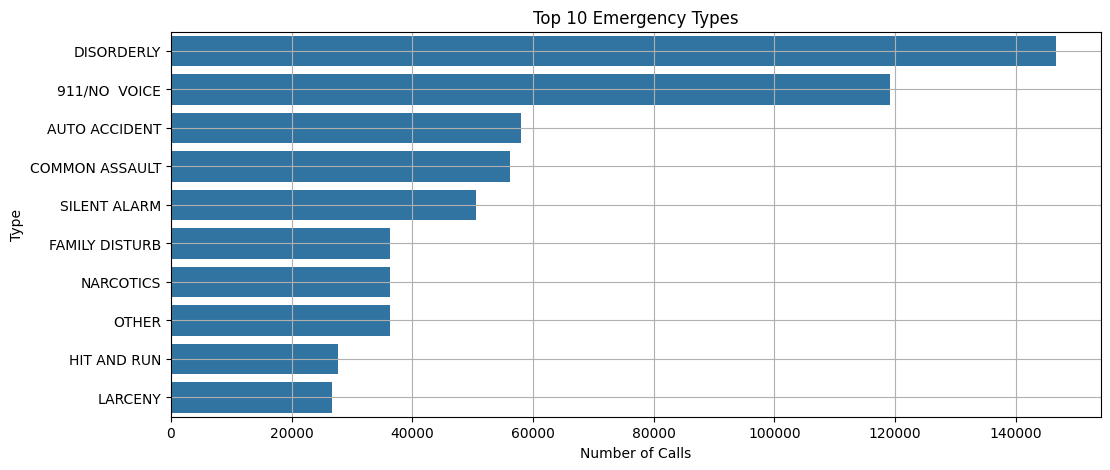

In [9]:
# Top 10 Emergency Types
plt.figure(figsize=(12, 5))
top_types = df['description'].value_counts().nlargest(10).index
sns.countplot(y='description', data=df[df['description'].isin(top_types)], order=top_types)
plt.title('Top 10 Emergency Types')
plt.xlabel('Number of Calls')
plt.ylabel('Type')
plt.grid(True)
plt.show()


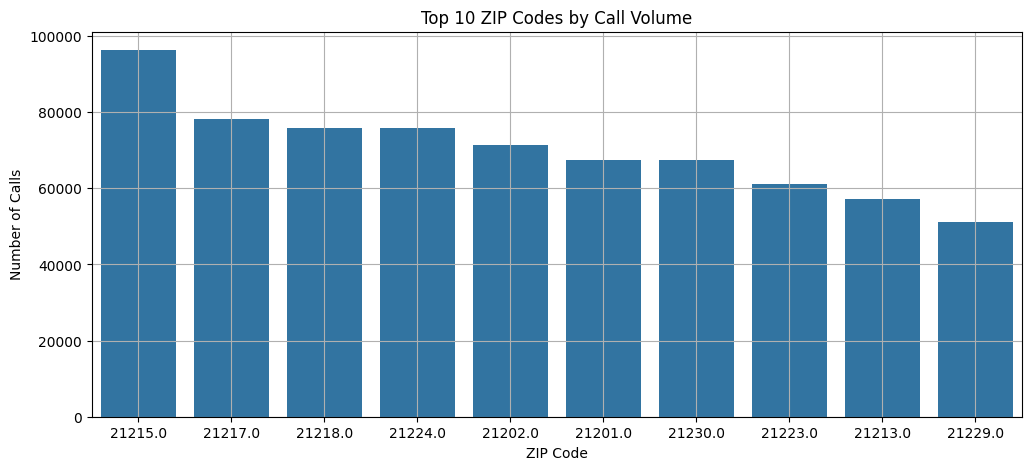

In [10]:
# Top 10 ZIP Codes by Call Volume
plt.figure(figsize=(12, 5))
top_zips = df['ZIPCode'].value_counts().nlargest(10).index
sns.countplot(x='ZIPCode', data=df[df['ZIPCode'].isin(top_zips)], order=top_zips)
plt.title('Top 10 ZIP Codes by Call Volume')
plt.xlabel('ZIP Code')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()
